# Comparisons and analysis

This notebook is for getting the simulated data done on the cluster and then doing funky comparisons and analysis

In [1]:
# First Import the packages.
from tvb.simulator.lab import *
LOG = get_logger('demo')
from tvb.simulator.plot.tools import *
import numpy as np
import pylab
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
from scipy import stats
#matplotlib.style.use('ggplot')
import inspect
import os
import csv 
import time

import glob
# import pandas as pd

# Now Import our data from our data folder:

# Get all csv filenames in a folder
all_files = glob.glob("do-not-track/*.csv")
#all_files

# Scorr of Empirical (Experimental) FCM vs SCM of Connectome

This gives a baseline of what the minimum correlation should be like. 

WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.


Text(0.05, 0.95, 'SpearmanrResult(correlation=0.3936670530573764, pvalue=2.4789217444587726e-53)')

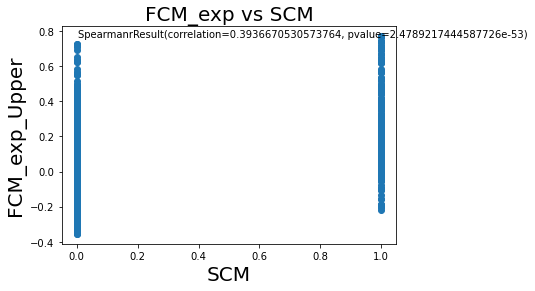

In [31]:
# Import Experimental Mouse Data FCM
FCM_exp = np.genfromtxt('do-not-track\\FCM_MouseExperimental.csv',delimiter = "\t")
# Simualted FCM
#FCM_sim = np.genfromtxt(all_files[4],delimiter="\t")
# Set up input Parameters for entire pipeline as dictionary elements here:

# Empty dict
ParamsDict = { }

# Name of import file/zip - Which contains connectivity data.
ParamsDict["name"] = "MouseCortex"

con = connectivity.Connectivity.from_file(os.getcwd() +"/Connectomes/" + ParamsDict["name"] + ".zip")

# Set SCM as Binary
con.weights = con.weights!=0
SCM = con.weights

# Comparing FC_experimental Vs FC_Simulation with Spearman Correlation

# Set diagonals to NaN
np.fill_diagonal(FCM_exp,np.nan)
np.fill_diagonal(SCM,np.nan)
# Check if SCM is symmetric: 
Sym_check = numpy.allclose(SCM, SCM.T,equal_nan=True)
if Sym_check == True:
    # Grab Upper triangles
    FCM_Upper = FCM_exp[np.triu_indices(FCM_exp.shape[0], k = 1)]
    SCM_Upper = SCM[np.triu_indices(FCM_sim.shape[0], k = 1)]

elif Sym_check == False:
    # If SCM is not symmetric, need to calcualte spearman corr for entire matrix.
    # Remove all Nans for SCM and FCM
    SCM_Upper = SCM[~numpy.isnan(SCM)]
    FCM_Upper = FCM_exp[~numpy.isnan(FCM_exp)]


# Spearman Correlation
SCorr = stats.spearmanr(a=FCM_Upper,b=SCM_Upper)
#print(SCorr)

# Scatterplot
plt.scatter(SCM_Upper,FCM_Upper)
plt.xlabel('SCM', fontsize=20)
plt.ylabel('FCM_exp', fontsize=20)
plt.title('FCM_exp vs SCM', fontsize=20)
plt.annotate(SCorr, xy=(0.05, 0.95), xycoords='axes fraction')

# Comparison of SCorr vs Selected Variable (G = Coupling constant)

 

In [4]:
# Get Scorr csv filenames in a folder
Scorr_files = glob.glob("do-not-track/*SCorr*.csv")

SCorr_array = []

# Loop to populate the empty array with the numbers from the Scorr csv files:

for item in Scorr_files:
    a = np.genfromtxt(item)
    SCorr_array.append(a[0])

print(SCorr_array)

[-0.053453065057792015, -0.053283921720290624, -0.05330062605666915, -0.05330062605666915, -0.05330062605666915, -0.05328382626693989, -0.05328382626693989, -0.05328382626693989, -0.05328382626693989, -0.05328382626693989, -0.053265069683520586, -0.053265069683520586, -0.05341984729173644, -0.0532429245061502, -0.053223595202626484, -0.053223595202626484, -0.05320841811985971, -0.05320841811985971, -0.05319524555745836, -0.05319524555745836, -0.05319524555745836, -0.05319524555745836, -0.05317782532094933, -0.05340085207494028, -0.05317782532094933, -0.05317782532094933, -0.053140550787487535, -0.053140550787487535, -0.053140550787487535, -0.053140550787487535, -0.053140550787487535, -0.053140550787487535, -0.05312465780459026, -0.05312465780459026, -0.05312465780459026, -0.05340085207494028, -0.05340085207494028, -0.05334229144426472, -0.05334229144426472, -0.05332243714731197, -0.05332243714731197, -0.05330234421698237]


Text(0.5, 1.0, 'Scorr vs G')

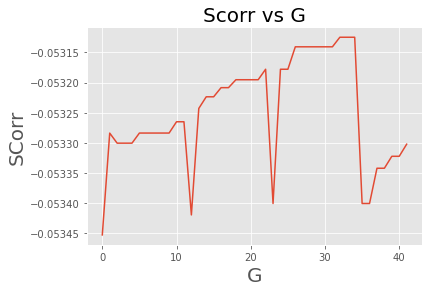

In [5]:
# Graph it: 

plt.plot(SCorr_array)
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr', fontsize=20)
plt.title('Scorr vs G', fontsize=20)

# Looking at a simulation run

In [2]:
all_files

['do-not-track\\3_2_BinCon_FCM_20200620-192305_.csv',
 'do-not-track\\3_2_BinCon_FCM_20200620-213150_.csv',
 'do-not-track\\3_2_BinCon_Params_20200620-192305_.csv',
 'do-not-track\\3_2_BinCon_Params_20200620-213150_.csv',
 'do-not-track\\3_2_BinCon_Scorr_20200620-192305_.csv',
 'do-not-track\\3_2_BinCon_Scorr_20200620-213150_.csv',
 'do-not-track\\3_2_BinCon_Tseries_20200620-192305_.csv',
 'do-not-track\\3_2_BinCon_Tseries_20200620-213150_.csv',
 'do-not-track\\FCM_MouseExperimental.csv',
 'do-not-track\\G_0_96_3_2_BinCon_FCM_20200621-064202_.csv',
 'do-not-track\\G_0_96_3_2_BinCon_Params_20200621-064202_.csv',
 'do-not-track\\G_0_96_3_2_BinCon_Scorr_20200621-064202_.csv',
 'do-not-track\\G_0_96_3_2_BinCon_Tseries_20200621-064202_.csv',
 'do-not-track\\G_0_96_MouseCortex_FCM_20200621-054941_.csv',
 'do-not-track\\G_0_96_MouseCortex_Params_20200621-054941_.csv',
 'do-not-track\\G_0_96_MouseCortex_Scorr_20200621-054941_.csv',
 'do-not-track\\G_0_96_MouseCortex_Tseries_20200621-054941_.cs

In [8]:
# Read file import data
#df = pd.read_csv(all_files[11],delimiter="\t",header=None)
# Genfromtxt gives us a np array. 
df = np.genfromtxt(all_files[-1],delimiter="\t")

bold_time = df[0]
bold_data = df[1:]

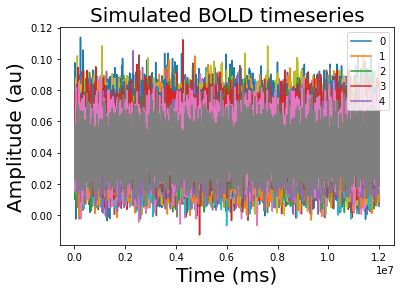

In [9]:
# plt.subplots()

#plt.figure(num=None, figsize=(60, 30), dpi=80, facecolor='w', edgecolor='k')
for tseries in bold_data:
    plt.plot(bold_time,tseries)

plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('Amplitude (au)', fontsize=20)
plt.title('Simulated BOLD timeseries', fontsize=20)
plt.legend(('0','1','2','3','4'))

In [11]:
Scorra = np.genfromtxt(all_files[-2])
Scorra

array([2.95215756e-01, 1.13363353e-29])

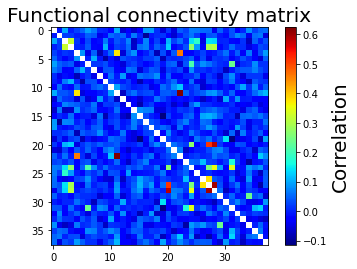

In [3]:
# Plot FCM

FCM1 = np.genfromtxt(all_files[13],delimiter="\t")

cs=plt.imshow(FCM1, cmap='jet', aspect='equal', interpolation='none')
plt.title('Functional connectivity matrix', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('Correlation', fontsize=20)
#plt.yticks([0,1,2,3])